# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
pip install citipy

     ---------------------------------------- 0.0/675.6 kB ? eta -:--:--
     -- ---------------------------------- 41.0/675.6 kB 991.0 kB/s eta 0:00:01
     --- ----------------------------------- 61.4/675.6 kB 1.1 MB/s eta 0:00:01
     --- ----------------------------------- 61.4/675.6 kB 1.1 MB/s eta 0:00:01
     --- ----------------------------------- 61.4/675.6 kB 1.1 MB/s eta 0:00:01
     --- --------------------------------- 71.7/675.6 kB 281.8 kB/s eta 0:00:03
     ---------- ------------------------- 194.6/675.6 kB 695.5 kB/s eta 0:00:01
     ---------- ------------------------- 194.6/675.6 kB 695.5 kB/s eta 0:00:01
     ---------- ------------------------- 194.6/675.6 kB 695.5 kB/s eta 0:00:01
     --------------- -------------------- 286.7/675.6 kB 681.0 kB/s eta 0:00:01
     ---------------- ------------------- 307.2/675.6 kB 679.5 kB/s eta 0:00:01
     ---------------- ------------------- 317.4/675.6 kB 614.4 kB/s eta 0:00:01
     ------------------- ---------------- 368.6

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
print(url+"&q=san francisco")

http://api.openweathermap.org/data/2.5/weather?units=metric&appid=6e4fff24d029c4f2cce6a0af4265f675&q=san francisco


In [31]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print(f"City {city} not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | tyuratam
Processing Record 3 of Set 1 | vila velha
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | qaqortoq
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | hami
Processing Record 9 of Set 1 | tazovsky
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | udachny
Processing Record 12 of Set 1 | santona
Processing Record 13 of Set 1 | hadibu
Processing Record 14 of Set 1 | west island
Processing Record 15 of Set 1 | antibes
Processing Record 16 of Set 1 | port lincoln
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | kingston
Processing Record 20 of Set 1 | san antonio de pale
Processing Record 21 of Set 1 | arar
Processing Record 22 of Set 1 | rio grande
Proce

Processing Record 42 of Set 4 | colonia
Processing Record 43 of Set 4 | talnakh
Processing Record 44 of Set 4 | qingdao
Processing Record 45 of Set 4 | severobaykal'sk
Processing Record 46 of Set 4 | buka
Processing Record 47 of Set 4 | macenta
Processing Record 48 of Set 4 | nadym
Processing Record 49 of Set 4 | alofi
Processing Record 0 of Set 5 | nukunonu
City nukunonu not found. Skipping...
Processing Record 1 of Set 5 | kloulklubed
Processing Record 2 of Set 5 | sijunjung
Processing Record 3 of Set 5 | newman
Processing Record 4 of Set 5 | itamaraca
Processing Record 5 of Set 5 | mahabe
City mahabe not found. Skipping...
Processing Record 6 of Set 5 | tapiramuta
Processing Record 7 of Set 5 | tromso
Processing Record 8 of Set 5 | cestos city
Processing Record 9 of Set 5 | gadzhiyevo
Processing Record 10 of Set 5 | lazaro cardenas
Processing Record 11 of Set 5 | salinopolis
Processing Record 12 of Set 5 | sao jose da coroa grande
Processing Record 13 of Set 5 | daru
Processing Reco

Processing Record 28 of Set 8 | sandnessjoen
Processing Record 29 of Set 8 | muroto-misakicho
Processing Record 30 of Set 8 | malango
Processing Record 31 of Set 8 | mchinji
Processing Record 32 of Set 8 | dokkum
Processing Record 33 of Set 8 | plettenberg bay
Processing Record 34 of Set 8 | nyala
Processing Record 35 of Set 8 | antsiranana
Processing Record 36 of Set 8 | karaidel'
Processing Record 37 of Set 8 | kununurra
Processing Record 38 of Set 8 | aktau
Processing Record 39 of Set 8 | fond parisien
Processing Record 40 of Set 8 | kohtla-jarve
Processing Record 41 of Set 8 | lipnik nad becvou
Processing Record 42 of Set 8 | kirakira
Processing Record 43 of Set 8 | vorkuta
Processing Record 44 of Set 8 | bel ombre
Processing Record 45 of Set 8 | sinop
Processing Record 46 of Set 8 | sola
Processing Record 47 of Set 8 | turkeli
Processing Record 48 of Set 8 | cruzeiro do sul
Processing Record 49 of Set 8 | saksaul'skiy
City saksaul'skiy not found. Skipping...
Processing Record 0 of

Processing Record 11 of Set 12 | adzope
Processing Record 12 of Set 12 | ngereklmadel
Processing Record 13 of Set 12 | al mijlad
Processing Record 14 of Set 12 | guigang
Processing Record 15 of Set 12 | thunder bay
Processing Record 16 of Set 12 | reutov
Processing Record 17 of Set 12 | walvis bay
Processing Record 18 of Set 12 | kyzyl
Processing Record 19 of Set 12 | manay
Processing Record 20 of Set 12 | mont-dore
Processing Record 21 of Set 12 | san andres tuxtla
Processing Record 22 of Set 12 | kapuskasing
Processing Record 23 of Set 12 | mstsislaw
Processing Record 24 of Set 12 | la'ie
Processing Record 25 of Set 12 | mugia
Processing Record 26 of Set 12 | valle vista
Processing Record 27 of Set 12 | arboletes
Processing Record 28 of Set 12 | maych'ew
Processing Record 29 of Set 12 | kailua-kona
Processing Record 30 of Set 12 | ahau
City ahau not found. Skipping...
Processing Record 31 of Set 12 | carloforte
Processing Record 32 of Set 12 | upper grand lagoon
Processing Record 33 

In [32]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          600
Lat           600
Lng           600
Max Temp      600
Humidity      600
Cloudiness    600
Wind Speed    600
Country       600
Date          600
dtype: int64

In [33]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,-5.73,84,24,6.29,GS,1694991830
1,tyuratam,45.6507,63.3156,17.32,37,41,3.58,KZ,1694991935
2,vila velha,-20.3297,-40.2925,23.30,88,0,5.66,BR,1694991796
3,edinburgh of the seven seas,-37.0676,-12.3116,12.50,83,63,11.36,SH,1694991935
4,qaqortoq,60.7167,-46.0333,2.75,58,0,1.20,GL,1694991935


In [36]:
# Export the City_Data into a csv
city_data_df.to_csv("./output_data/cities.csv", index_label="City_ID")

In [37]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-5.73,84,24,6.29,GS,1694991830
1,tyuratam,45.6507,63.3156,17.32,37,41,3.58,KZ,1694991935
2,vila velha,-20.3297,-40.2925,23.30,88,0,5.66,BR,1694991796
3,edinburgh of the seven seas,-37.0676,-12.3116,12.50,83,63,11.36,SH,1694991935
4,qaqortoq,60.7167,-46.0333,2.75,58,0,1.20,GL,1694991935


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

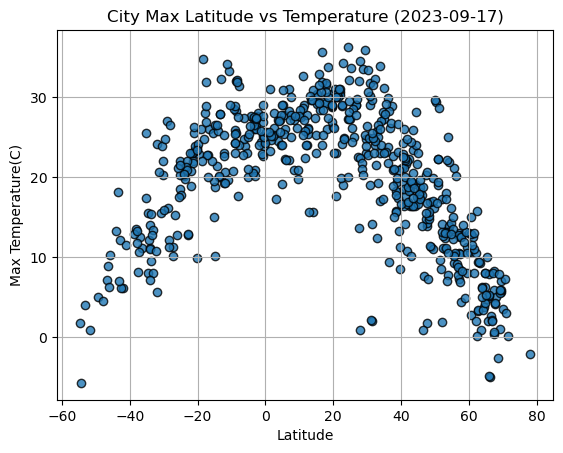

In [40]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values,edgecolor="black", linewidths=1, marker ="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.grid()
plt.title("City Max Latitude vs Temperature (2023-09-17)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

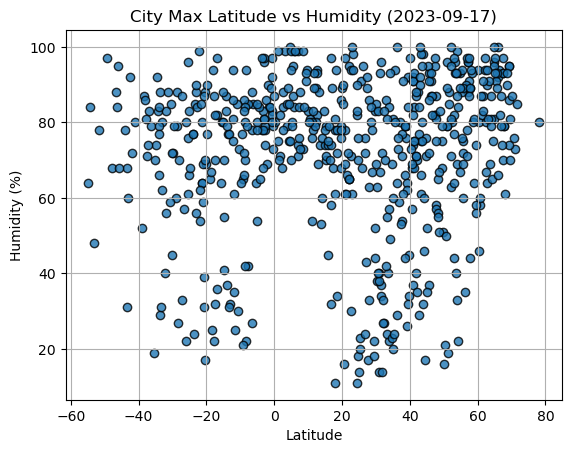

In [43]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values,edgecolor="black", linewidths=1, marker ="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title("City Max Latitude vs Humidity (2023-09-17)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

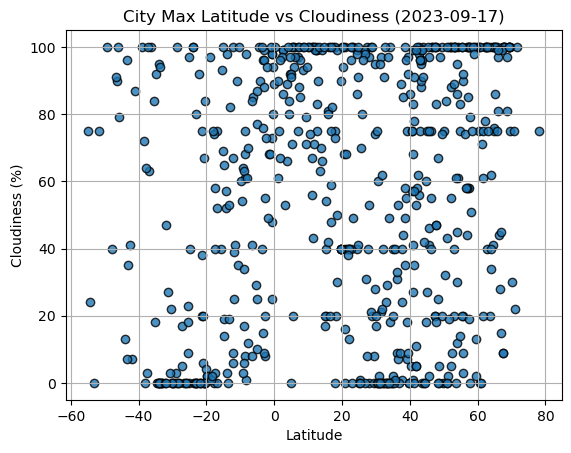

In [44]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values,edgecolor="black", linewidths=1, marker ="o", alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title("City Max Latitude vs Cloudiness (2023-09-17)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

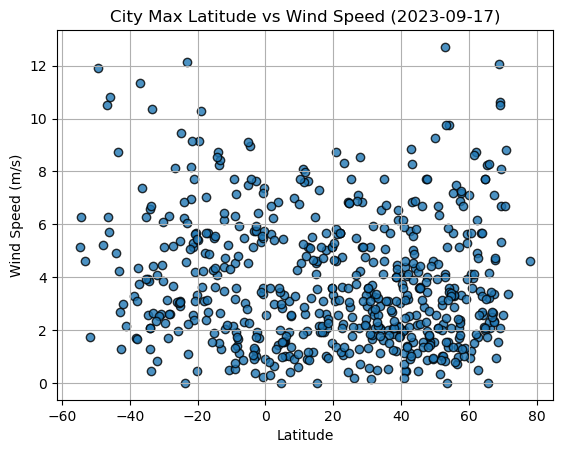

In [45]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values,edgecolor="black", linewidths=1, marker ="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
plt.title("City Max Latitude vs Wind Speed (2023-09-17)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [54]:
# Define a function to create Linear Regression plots
def plot_lin_regression(x_value, y_value, title, text_coord):

    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    plt.xlabel("Lat")
    plt.ylabel(title)
    print(f"The r-value is {rvalue**2}")

In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tyuratam,45.6507,63.3156,17.32,37,41,3.58,KZ,1694991935
4,qaqortoq,60.7167,-46.0333,2.75,58,0,1.20,GL,1694991935
5,longyearbyen,78.2186,15.6401,-2.09,80,75,4.63,SJ,1694991936
7,hami,42.8000,93.4500,16.37,29,98,5.75,CN,1694991936
8,tazovsky,67.4667,78.7000,8.24,97,100,3.35,RU,1694991936


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-5.73,84,24,6.29,GS,1694991830
2,vila velha,-20.3297,-40.2925,23.30,88,0,5.66,BR,1694991796
3,edinburgh of the seven seas,-37.0676,-12.3116,12.50,83,63,11.36,SH,1694991935
6,port-aux-francais,-49.3500,70.2167,5.01,97,100,11.92,TF,1694991936
9,adamstown,-25.0660,-130.1015,18.47,66,97,5.36,PN,1694991937


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.6158293250352268


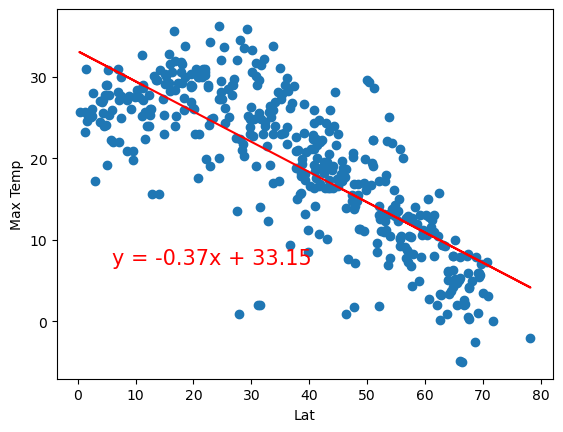

In [58]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
title = ("Max Temp")
text_coord = (6,7)
plot_lin_regression(x_values, y_values, title, text_coord)

The r-value is 0.6154203175368649


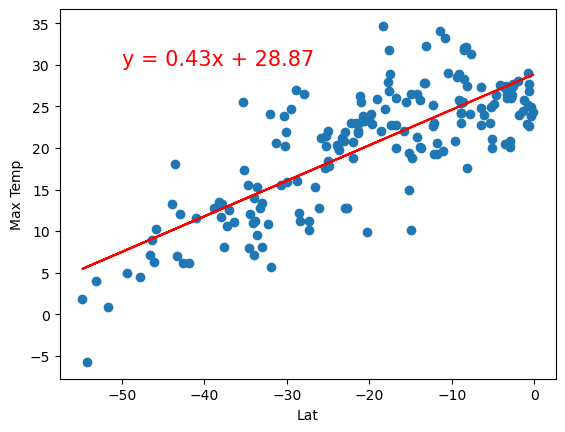

In [61]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
title = ("Max Temp")
text_coord = (-50,30)
plot_lin_regression(x_values, y_values, title, text_coord)

**Discussion about the linear relationship:** The northern hemisphere has a negative relationship, as Latitude increases, the temp decreases.For the southern hemisphere, the temp increases as the Latitude increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.005378685924757811


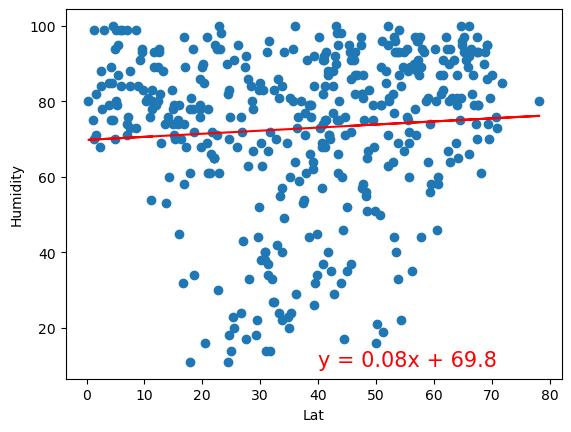

In [62]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
title = ("Humidity")
text_coord = (40,10)
plot_lin_regression(x_values, y_values, title, text_coord)

The r-value is 0.0048760432409967495


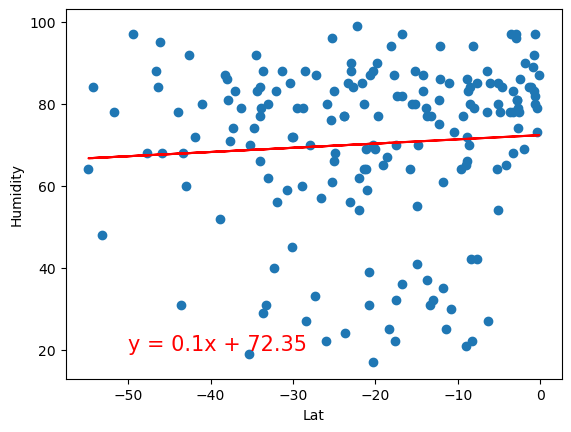

In [63]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
title = ("Humidity")
text_coord = (-50,20)
plot_lin_regression(x_values, y_values, title, text_coord)

**Discussion about the linear relationship:** Both plots of humidity have a weak correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.0016825994268308744


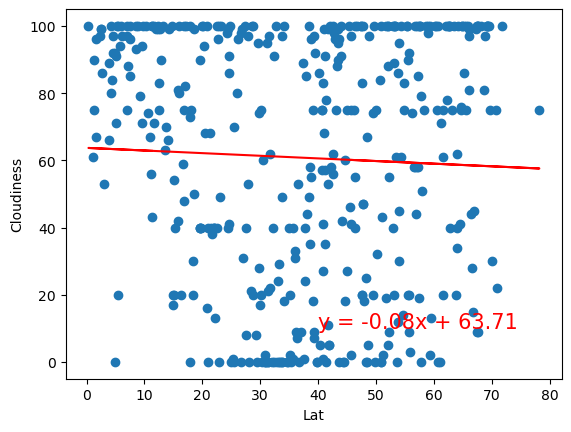

In [64]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
title = ("Cloudiness")
text_coord = (40,10)
plot_lin_regression(x_values, y_values, title, text_coord)

The r-value is 0.029299203472247386


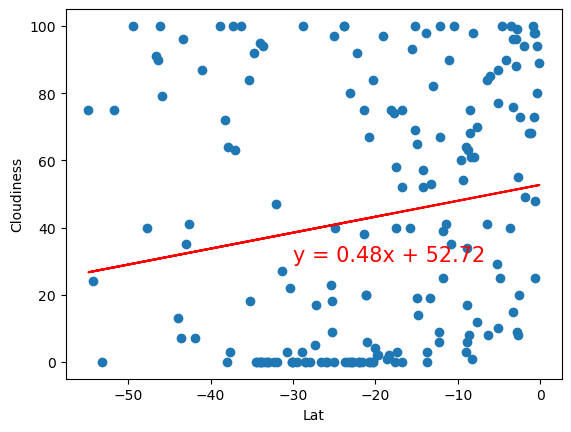

In [65]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
title = ("Cloudiness")
text_coord = (-30,30)
plot_lin_regression(x_values, y_values, title, text_coord)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.011617589331486471


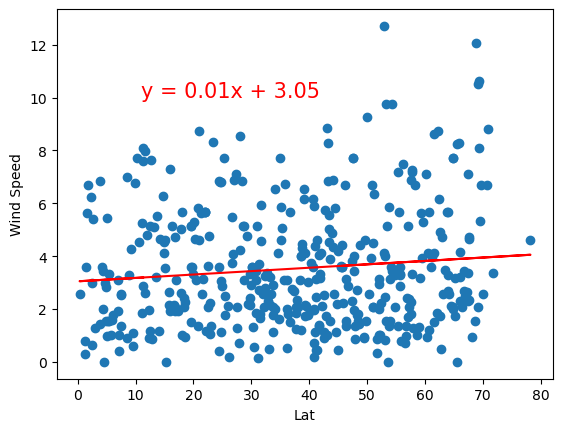

In [67]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
title = ("Wind Speed")
text_coord = (11,10)
plot_lin_regression(x_values, y_values, title, text_coord)

The r-value is 0.017307140181751425


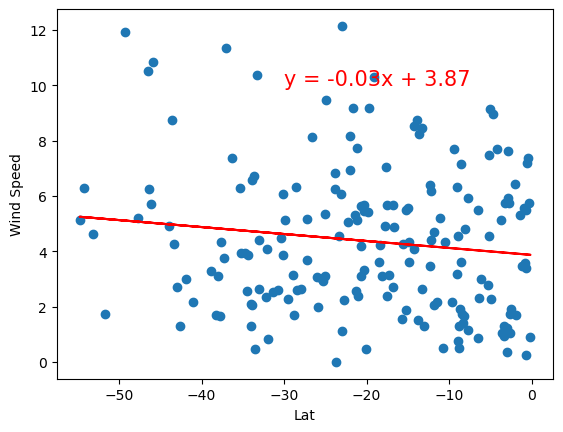

In [69]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
title = ("Wind Speed")
text_coord = (-30,10)
plot_lin_regression(x_values, y_values, title, text_coord)

**Discussion about the linear relationship:** YOUR RESPONSE HERE